In [24]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile 
from qiskit_aer import Aer 
from qiskit.visualization import plot_histogram
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import random_statevector
from qiskit.visualization import plot_bloch_multivector
from qiskit.extensions import Initialize 

In [3]:
crx = ClassicalRegister(1,name="crx") 
crz = ClassicalRegister(1,name="crz")
qr = QuantumRegister(3,name="q")
circuit = QuantumCircuit(qr,crz,crx)

In [4]:
def bell_pair(qc,a,b):
    qc.h(a)
    qc.cx(a,b)

In [5]:
bell_pair(circuit,1,2)

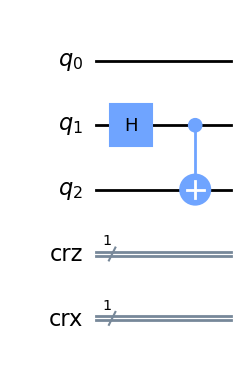

In [6]:
circuit.draw('mpl')

In [7]:
def alice_gate(qc,psi,a):
    qc.cx(psi,a)
    qc.h(psi)

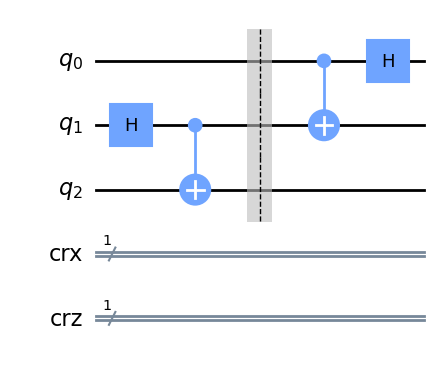

In [8]:
qr = QuantumRegister(3,name="q")
crx = ClassicalRegister(1,name="crx")
crz = ClassicalRegister(1,name="crz")
circuit = QuantumCircuit(qr,crx,crz)
def bell_paire(qc,a,b):
    qc.h(a)
    qc.cx(a,b)
def alice_gate(qc,psi,a):
    qc.cx(psi,a)
    qc.h(psi)
bell_paire(circuit,1,2)
circuit.barrier()
alice_gate(circuit,0,1)
circuit.draw("mpl")

In [9]:
def measure_and_send(qc,psi,a):
    qc.barrier()
    qc.measure(psi,0)
    qc.measure(a,1)

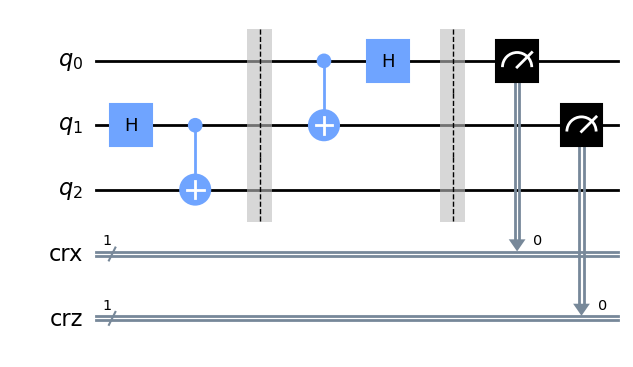

In [10]:
measure_and_send(circuit,0,1)
circuit.draw("mpl")

In [11]:
def bob_gates(qc,b,crx,crz):
    qc.barrier()
    qc.x(b).c_if(crx,1)
    qc.z(b).c_if(crz,1)

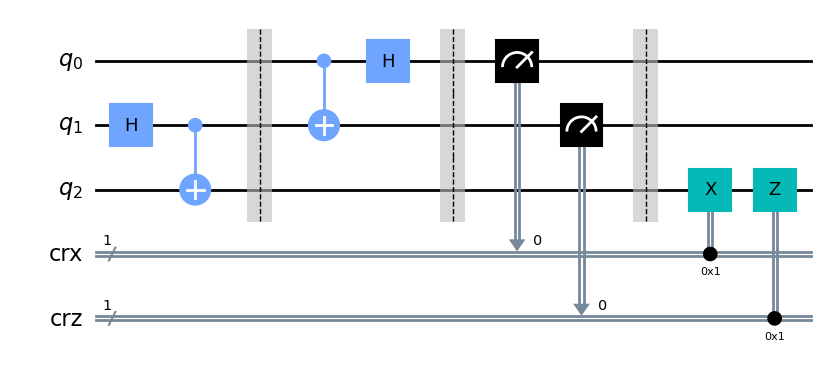

In [12]:
bob_gates(circuit,2,crx,crz)
circuit.draw("mpl")

In [13]:
psi = random_statevector(2)

In [16]:
array_to_latex(psi)

<IPython.core.display.Latex object>

In [21]:
display(array_to_latex(psi, prefix="|\\psi\\rangle = "))

<IPython.core.display.Latex object>

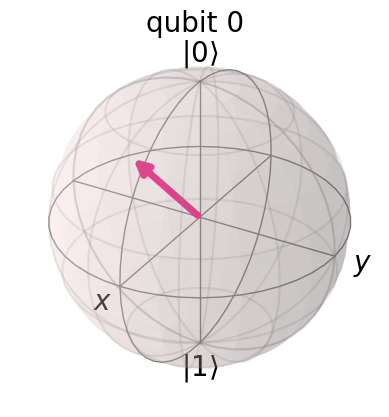

In [23]:
plot_bloch_multivector(psi)

In [25]:
init_gate = Initialize(psi)

In [29]:
init_gate.label = "init"

In [34]:
init_gate.reverse_ops

<bound method Instruction.reverse_ops of Instruction(name='initialize', num_qubits=1, num_clbits=0, params=[(0.34203046776482104-0.6118287048124504j), (-0.7127900173421675+0.024722181648259747j)])>

In [36]:
circuit.append(init_gate,[0])

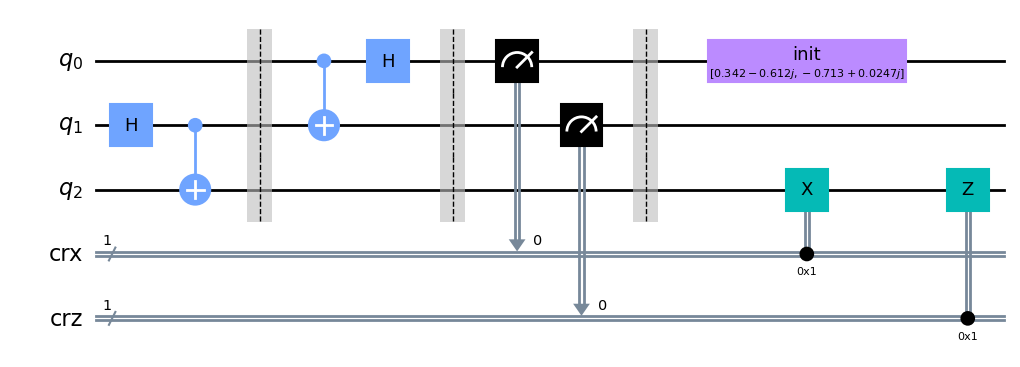

In [37]:
circuit.draw("mpl")

In [1]:
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, transpile 
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex 
from qiskit.quantum_info import random_statevector 
from qiskit.extensions import Initialize 

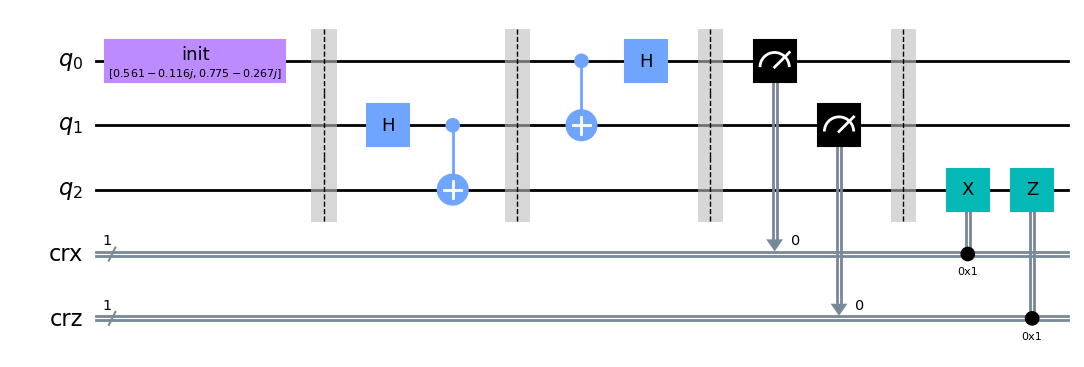

In [2]:
crx = ClassicalRegister(1,name="crx")
crz = ClassicalRegister(1,name="crz")
qr = QuantumRegister(3,name="q")
circuit = QuantumCircuit(qr,crx,crz)
############################
# step 1
def bell_state(qc,a,b):
    qc.h(a)
    qc.cx(a,b)
# step 2
def alice_gates(qc,psi,a):
    qc.cx(psi,a)
    qc.h(psi)
# step 3 
def measure_send(qc,psi,a):
    qc.measure(psi,0)
    qc.measure(a,1)
# step 4
def bob_gates(qc,b,crx,crz):
    qc.x(b).c_if(crx,1)
    qc.z(b).c_if(crz,1)

###################
psi = random_statevector(2)
init_gate = Initialize(psi)
init_gate.label = "init"

circuit.append(init_gate,[0])
circuit.barrier()
bell_state(circuit,1,2)
circuit.barrier()
alice_gates(circuit,0,1)
circuit.barrier()
measure_send(circuit,0,1)
circuit.barrier()
bob_gates(circuit,2,crx,crz)
circuit.draw("mpl")

In [6]:
simulator = AerSimulator()
circuit.save_statevector()
circuit_compiled = transpile(circuit,backend=simulator)
job = simulator.run(circuit_compiled,shots=1000)
result = job.result()
out_vector = result.get_statevector()
plot_bloch_multivector(out_vector)

Simulation failed and returned the following error message:
ERROR: Failed to load qobj: Duplicate key "statevector" in save instruction.


QiskitError: 'You have to select a circuit or schedule when there is more than one available'

In [2]:
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, transpile 
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex 
from qiskit.quantum_info import random_statevector ,Statevector
from qiskit.extensions import Initialize 

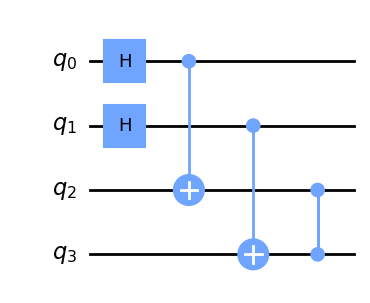

In [3]:
c = QuantumCircuit(4)
c.h(0)
c.h(1)
c.cx(0,2)
c.cx(1,3)
c.cz(2,3)
c.draw("mpl")

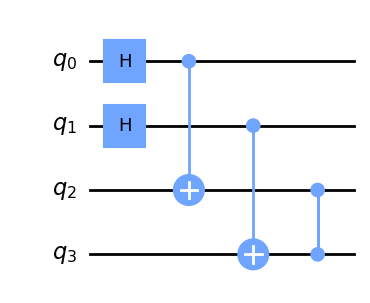

In [4]:
c2 = QuantumCircuit(4)
c2.h(0)
c2.h(1)
c2.cx(0,2)
c2.cx(1,3)
# c.cz(2,3)
# c2.draw("mpl")

In [26]:
import numpy as np

In [1]:
s_0 = Statevector.from_int([0,1],16)
s_0.draw("latex")

NameError: name 'Statevector' is not defined

In [33]:
s_f = s_0.evolve(c)
s_f.draw("latex")

<IPython.core.display.Latex object>